<a href="https://colab.research.google.com/github/nilesh9999/Banglore_hpps/blob/main/Predictive_Maintenance_Multilabel_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predictive Maintenance Multilabel Classification

In [ ]:
#for data manupulation and dataframe and numeric calculations
import pandas as pd
import numpy as np
#for visualization
import matplotlib.pyplot as plt
import seaborn as sns
!pip install scikit.plot
!pip install lightgbm
import scikitplot as skplt
#for various algorithm for testing and training and metrics for evaluation
!pip install --upgrade scikit-learn
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OutputCodeClassifier
from sklearn.metrics import f1_score,fbeta_score,matthews_corrcoef,log_loss,confusion_matrix,classification_report,make_scorer,balanced_accuracy_score,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score,roc_curve,auc,recall_score,roc_auc_score,average_precision_score,precision_score,precision_recall_curve
from lightgbm import LGBMClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import (OneHotEncoder,PowerTransformer,StandardScaler)
from sklearn.multioutput import MultiOutputClassifier
!pip install catboost

In [ ]:
df=pd.read_csv(r'D:\Project\predictive maintenance\Dataset\predictive_maintenance.csv')

In [ ]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [ ]:
df['Failure Type'].value_counts()

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelBinarizer
labelbinarizer = LabelBinarizer()
encoded_results_1 = labelbinarizer.fit_transform(df["Failure Type"])


In [ ]:
encoded_results_1

array([[0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       ...,
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0]])

In [ ]:
df_encoded_1 = pd.DataFrame(encoded_results_1,columns=labelbinarizer.classes_)

In [ ]:
encoded_results_2 = labelbinarizer.fit_transform(df["Type"])

In [ ]:
df_encoded_2 = pd.DataFrame(encoded_results_2,columns=labelbinarizer.classes_)

In [ ]:
df1 = pd.concat([df,df_encoded_1, df_encoded_2], axis=1)

In [ ]:
df1

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Heat Dissipation Failure,No Failure,Overstrain Failure,Power Failure,Random Failures,Tool Wear Failure,H,L,M
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure,0,1,0,0,0,0,0,0,1
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure,0,1,0,0,0,0,0,1,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure,0,1,0,0,0,0,0,1,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure,0,1,0,0,0,0,0,1,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure,0,1,0,0,0,0,0,0,1
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure,0,1,0,0,0,0,1,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure,0,1,0,0,0,0,0,0,1
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure,0,1,0,0,0,0,1,0,0


In [ ]:
df1.drop(['Product ID',"UDI","Type","Failure Type"], axis=1, inplace=True)

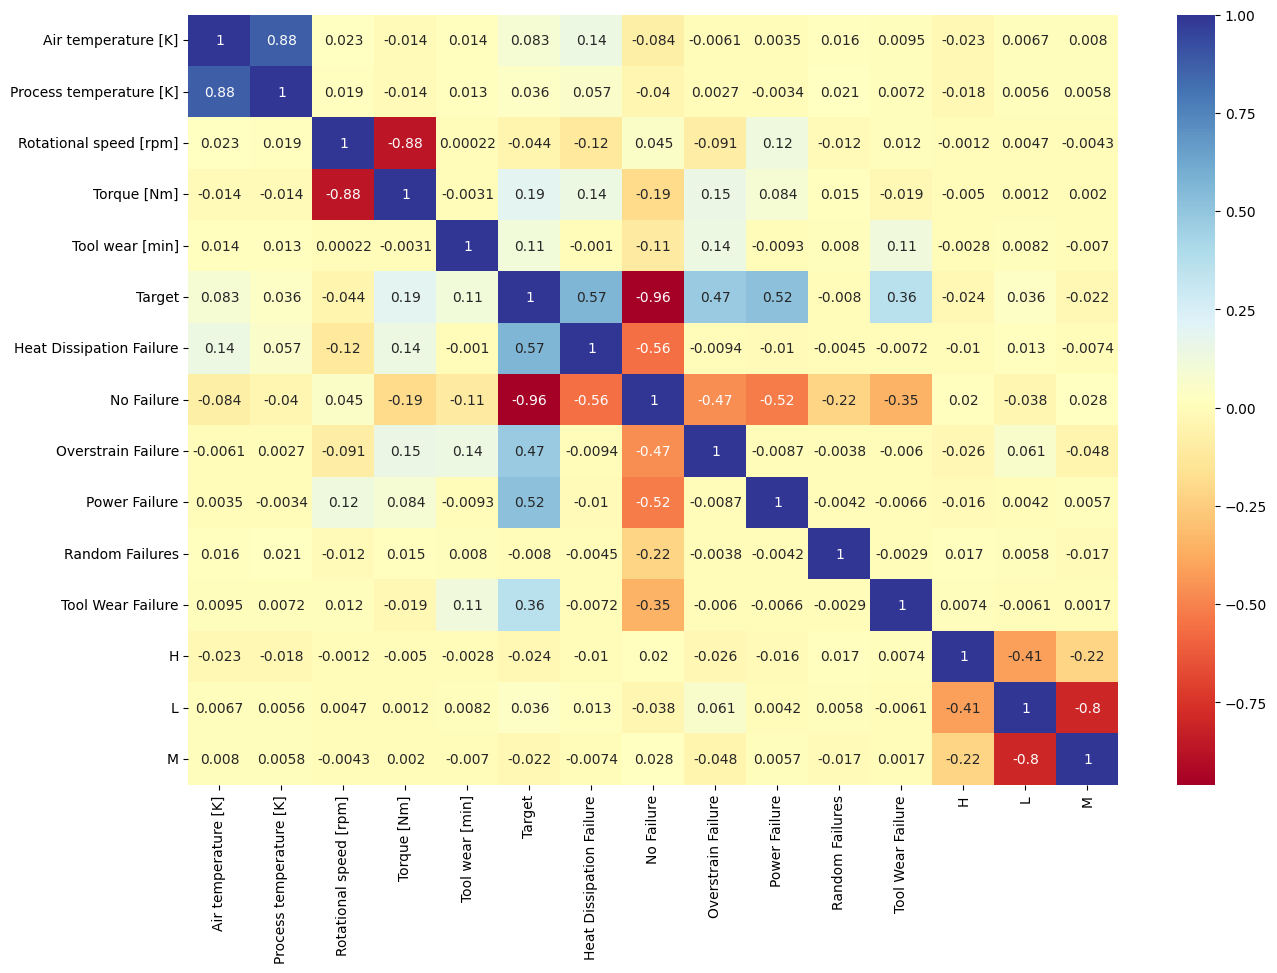

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(),annot = True,cmap = "RdYlBu")
plt.draw()


In [ ]:
df1.isnull().values.any()

False

In [ ]:
df1

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Heat Dissipation Failure,No Failure,Overstrain Failure,Power Failure,Random Failures,Tool Wear Failure,H,L,M
0,298.1,308.6,1551,42.8,0,0,0,1,0,0,0,0,0,0,1
1,298.2,308.7,1408,46.3,3,0,0,1,0,0,0,0,0,1,0
2,298.1,308.5,1498,49.4,5,0,0,1,0,0,0,0,0,1,0
3,298.2,308.6,1433,39.5,7,0,0,1,0,0,0,0,0,1,0
4,298.2,308.7,1408,40.0,9,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0,0,1,0,0,0,0,0,0,1
9996,298.9,308.4,1632,31.8,17,0,0,1,0,0,0,0,1,0,0
9997,299.0,308.6,1645,33.4,22,0,0,1,0,0,0,0,0,0,1
9998,299.0,308.7,1408,48.5,25,0,0,1,0,0,0,0,1,0,0


In [ ]:
DF = df1[['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]','H','L','M','Target','No Failure','Heat Dissipation Failure','Overstrain Failure','Power Failure','Tool Wear Failure',
 'Random Failures']]

In [ ]:
DF

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],H,L,M,Target,No Failure,Heat Dissipation Failure,Overstrain Failure,Power Failure,Tool Wear Failure,Random Failures
0,298.1,308.6,1551,42.8,0,0,0,1,0,1,0,0,0,0,0
1,298.2,308.7,1408,46.3,3,0,1,0,0,1,0,0,0,0,0
2,298.1,308.5,1498,49.4,5,0,1,0,0,1,0,0,0,0,0
3,298.2,308.6,1433,39.5,7,0,1,0,0,1,0,0,0,0,0
4,298.2,308.7,1408,40.0,9,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0,0,1,0,1,0,0,0,0,0
9996,298.9,308.4,1632,31.8,17,1,0,0,0,1,0,0,0,0,0
9997,299.0,308.6,1645,33.4,22,0,0,1,0,1,0,0,0,0,0
9998,299.0,308.7,1408,48.5,25,1,0,0,0,1,0,0,0,0,0


In [ ]:
DF.columns=DF.columns.astype("str")

In [ ]:
col_name=DF.columns.to_list()

In [ ]:
col_name

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'H',
 'L',
 'M',
 'Target',
 'No Failure',
 'Heat Dissipation Failure',
 'Overstrain Failure',
 'Power Failure',
 'Tool Wear Failure',
 'Random Failures']

In [ ]:
DF = DF.reset_index(drop=True)

In [ ]:
DF

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],H,L,M,Target,No Failure,Heat Dissipation Failure,Overstrain Failure,Power Failure,Tool Wear Failure,Random Failures
0,298.1,308.6,1551,42.8,0,0,0,1,0,1,0,0,0,0,0
1,298.2,308.7,1408,46.3,3,0,1,0,0,1,0,0,0,0,0
2,298.1,308.5,1498,49.4,5,0,1,0,0,1,0,0,0,0,0
3,298.2,308.6,1433,39.5,7,0,1,0,0,1,0,0,0,0,0
4,298.2,308.7,1408,40.0,9,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0,0,1,0,1,0,0,0,0,0
9996,298.9,308.4,1632,31.8,17,1,0,0,0,1,0,0,0,0,0
9997,299.0,308.6,1645,33.4,22,0,0,1,0,1,0,0,0,0,0
9998,299.0,308.7,1408,48.5,25,1,0,0,0,1,0,0,0,0,0


In [ ]:
X = DF.values[:, 0:8].astype("float")
y = DF.values[:,8:].astype("uint8")
print(X.shape)
print(y.shape)

(10000, 8)
(10000, 7)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33)

In [ ]:
y_train.shape

(6700, 7)

In [ ]:
y_test.shape

(3300, 7)

In [ ]:
scaler = StandardScaler().fit(X_test)

In [ ]:
lgbm = LGBMClassifier()

In [ ]:
from sklearn.multioutput import ClassifierChain

In [ ]:
model_lgb = MultiOutputClassifier(estimator=lgbm,n_jobs=None)

In [ ]:
chain_lgbm = ClassifierChain(lgbm, order='random', random_state=0)

In [ ]:
model_lgb_pred = chain_lgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 15, number of negative: 6685
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001006 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 926
[LightGBM] [Info] Number of data points in the train set: 6700, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002239 -> initscore=-6.099571
[LightGBM] [Info] Start training from score -6.099571
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

In [ ]:
print(model_lgb_pred.score(X_test,y_test))

0.9872727272727273


In [ ]:
yhat_lgb = model_lgb_pred.predict(X_test)

In [ ]:
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,0],yhat_lgb[:,0])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,0],yhat_lgb[:,0])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,0],yhat_lgb[:,0])))
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,1],yhat_lgb[:,1])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,1],yhat_lgb[:,1])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,1],yhat_lgb[:,1])))
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,2],yhat_lgb[:,2])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,2],yhat_lgb[:,2])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,2],yhat_lgb[:,2])))
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,3],yhat_lgb[:,3])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,3],yhat_lgb[:,3])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,3],yhat_lgb[:,3])))
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,4],yhat_lgb[:,4])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,4],yhat_lgb[:,4])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,4],yhat_lgb[:,4])))
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,5],yhat_lgb[:,5])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,5],yhat_lgb[:,5])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,5],yhat_lgb[:,5])))
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,6],yhat_lgb[:,6])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,6],yhat_lgb[:,6])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,6],yhat_lgb[:,6])))

Accuracy Score: 0.9894
Average Precision Score: 0.6806
Matthews correlation coefficient: 0.8143
Accuracy Score: 0.9891
Average Precision Score: 0.9897
Matthews correlation coefficient: 0.8104
Accuracy Score: 0.9988
Average Precision Score: 0.8762
Matthews correlation coefficient: 0.9348
Accuracy Score: 0.9976
Average Precision Score: 0.6768
Matthews correlation coefficient: 0.8204
Accuracy Score: 0.9967
Average Precision Score: 0.6657
Matthews correlation coefficient: 0.8130
Accuracy Score: 0.9945
Average Precision Score: 0.0052
Matthews correlation coefficient: -0.0013
Accuracy Score: 0.9991
Average Precision Score: 0.0009
Matthews correlation coefficient: 0.0000


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3194
           1       0.96      0.70      0.81       106

    accuracy                           0.99      3300
   macro avg       0.98      0.85      0.90      3300
weighted avg       0.99      0.99      0.99      3300



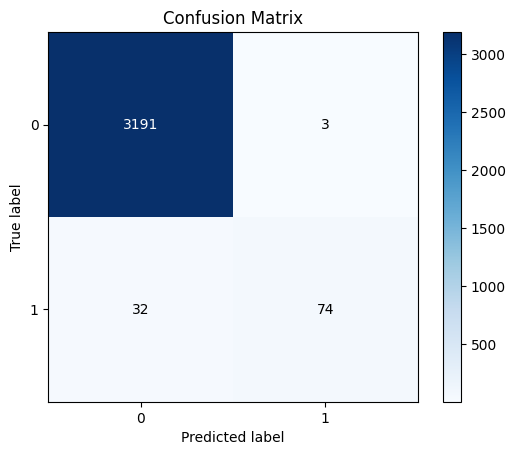

              precision    recall  f1-score   support

           0       0.96      0.69      0.80       107
           1       0.99      1.00      0.99      3193

    accuracy                           0.99      3300
   macro avg       0.98      0.85      0.90      3300
weighted avg       0.99      0.99      0.99      3300



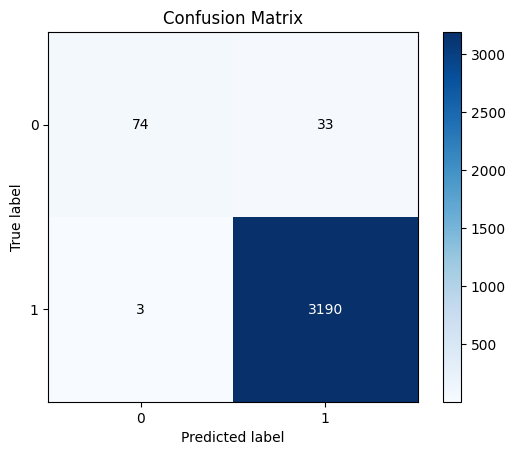

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3268
           1       1.00      0.88      0.93        32

    accuracy                           1.00      3300
   macro avg       1.00      0.94      0.97      3300
weighted avg       1.00      1.00      1.00      3300



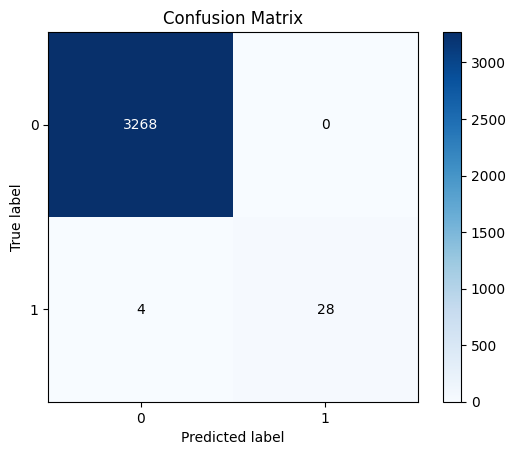

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3276
           1       0.90      0.75      0.82        24

    accuracy                           1.00      3300
   macro avg       0.95      0.87      0.91      3300
weighted avg       1.00      1.00      1.00      3300



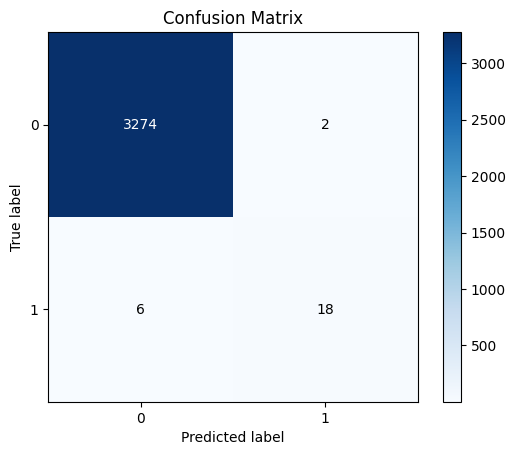

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3269
           1       0.86      0.77      0.81        31

    accuracy                           1.00      3300
   macro avg       0.93      0.89      0.91      3300
weighted avg       1.00      1.00      1.00      3300



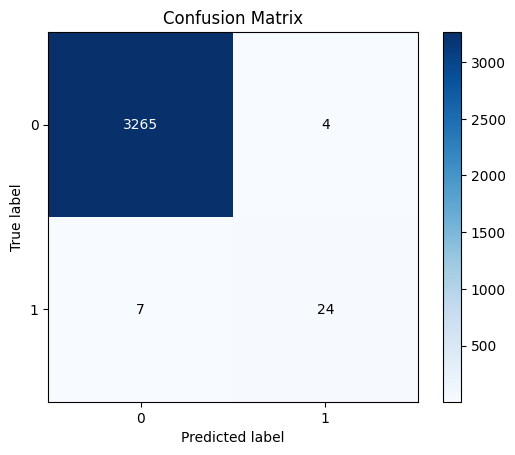

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3283
           1       0.00      0.00      0.00        17

    accuracy                           0.99      3300
   macro avg       0.50      0.50      0.50      3300
weighted avg       0.99      0.99      0.99      3300



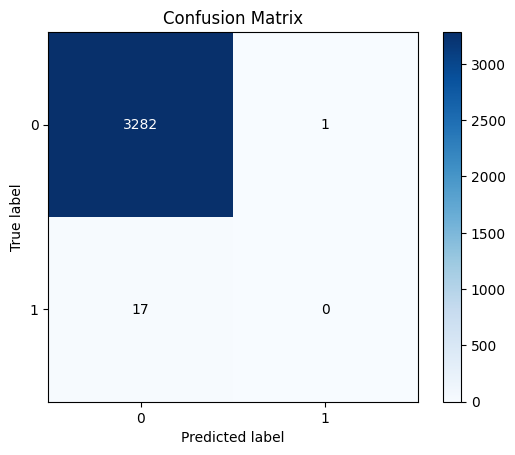

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3297
           1       0.00      0.00      0.00         3

    accuracy                           1.00      3300
   macro avg       0.50      0.50      0.50      3300
weighted avg       1.00      1.00      1.00      3300



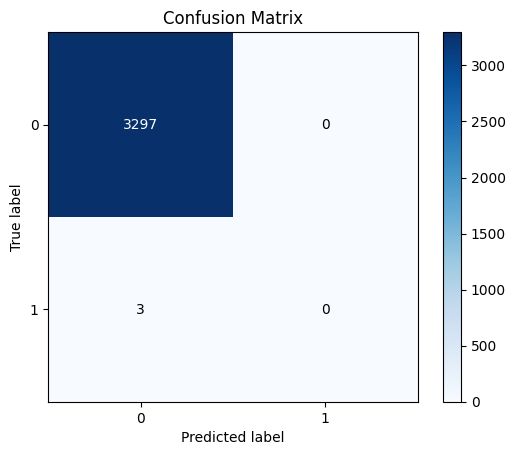

In [ ]:
print(classification_report(y_test[:,0],yhat_lgb[:,0]))
tn, fp, fn, tp = confusion_matrix(y_test[:,0],yhat_lgb[:,0]).ravel()
skplt.metrics.plot_confusion_matrix(y_test[:,0],yhat_lgb[:,0], normalize=False)
plt.show()
print(classification_report(y_test[:,1],yhat_lgb[:,1]))
tn, fp, fn, tp = confusion_matrix(y_test[:,1],yhat_lgb[:,1]).ravel()
skplt.metrics.plot_confusion_matrix(y_test[:,1],yhat_lgb[:,1], normalize=False)
plt.show()
print(classification_report(y_test[:,2],yhat_lgb[:,2]))
tn, fp, fn, tp = confusion_matrix(y_test[:,2],yhat_lgb[:,2]).ravel()
skplt.metrics.plot_confusion_matrix(y_test[:,2],yhat_lgb[:,2], normalize=False)
plt.show()
print(classification_report(y_test[:,3],yhat_lgb[:,3]))
tn, fp, fn, tp = confusion_matrix(y_test[:,3],yhat_lgb[:,3]).ravel()
skplt.metrics.plot_confusion_matrix(y_test[:,3],yhat_lgb[:,3], normalize=False)
plt.show()
print(classification_report(y_test[:,4],yhat_lgb[:,4]))
tn, fp, fn, tp = confusion_matrix(y_test[:,4],yhat_lgb[:,4]).ravel()
skplt.metrics.plot_confusion_matrix(y_test[:,4],yhat_lgb[:,4], normalize=False)
plt.show()
print(classification_report(y_test[:,5],yhat_lgb[:,5]))
tn, fp, fn, tp = confusion_matrix(y_test[:,5],yhat_lgb[:,5]).ravel()
skplt.metrics.plot_confusion_matrix(y_test[:,5],yhat_lgb[:,5], normalize=False)
plt.show()
print(classification_report(y_test[:,6],yhat_lgb[:,6]))
tn, fp, fn, tp = confusion_matrix(y_test[:,6],yhat_lgb[:,6]).ravel()
skplt.metrics.plot_confusion_matrix(y_test[:,6],yhat_lgb[:,6], normalize=False)
plt.show()

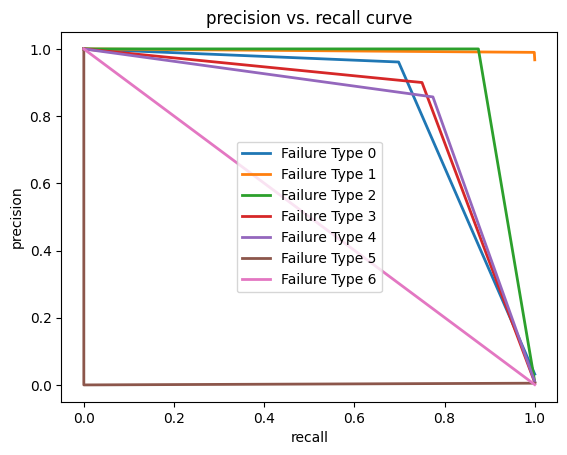

In [ ]:
# precision recall curve
precision = dict()
recall = dict()
n_classes = 7
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:,i],
                                                        yhat_lgb[:,i])
    plt.plot(recall[i], precision[i], lw=2, label='Failure Type {}'.format(i))

plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

In [ ]:
rand = RandomForestClassifier()
rf = MultiOutputClassifier(estimator=rand)

In [ ]:
rf.fit(X_train, y_train)
print(rf.score(X_test, y_test))

0.9769696969696969


In [ ]:
yhat_rand = rf.predict(X_test)

In [ ]:
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,0],yhat_rand[:,0])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,0],yhat_rand[:,0])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,0],yhat_rand[:,0])))
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,1],yhat_rand[:,1])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,1],yhat_rand[:,1])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,1],yhat_rand[:,1])))
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,2],yhat_rand[:,2])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,2],yhat_rand[:,2])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,2],yhat_rand[:,2])))
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,3],yhat_rand[:,3])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,3],yhat_rand[:,3])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,3],yhat_rand[:,3])))
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,4],yhat_rand[:,4])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,4],yhat_rand[:,4])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,4],yhat_rand[:,4])))
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,5],yhat_rand[:,5])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,5],yhat_rand[:,5])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,5],yhat_rand[:,5])))

Accuracy Score: 0.9830
Average Precision Score: 0.4901
Matthews correlation coefficient: 0.6819
Accuracy Score: 0.9839
Average Precision Score: 0.9846
Matthews correlation coefficient: 0.7050
Accuracy Score: 0.9948
Average Precision Score: 0.4739
Matthews correlation coefficient: 0.6829
Accuracy Score: 0.9948
Average Precision Score: 0.2968
Matthews correlation coefficient: 0.5387
Accuracy Score: 0.9964
Average Precision Score: 0.6178
Matthews correlation coefficient: 0.7823
Accuracy Score: 0.9948
Average Precision Score: 0.0052
Matthews correlation coefficient: 0.0000


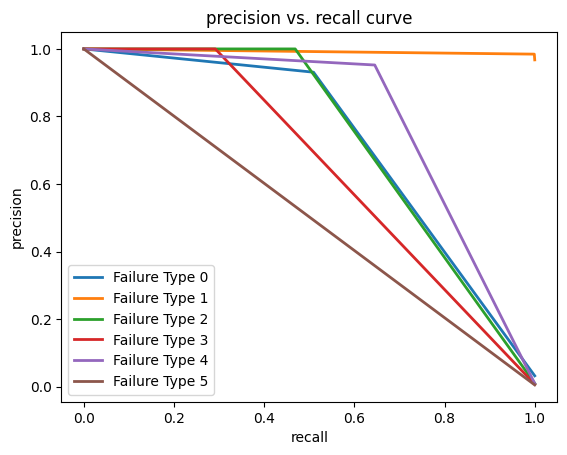

In [ ]:
# precision recall curve
precision = dict()
recall = dict()
n_classes = 6
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:,i],
                                                        yhat_rand[:,i])
    plt.plot(recall[i], precision[i], lw=2, label='Failure Type {}'.format(i))

plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3194
           1       0.93      0.51      0.66       106

    accuracy                           0.98      3300
   macro avg       0.96      0.75      0.82      3300
weighted avg       0.98      0.98      0.98      3300



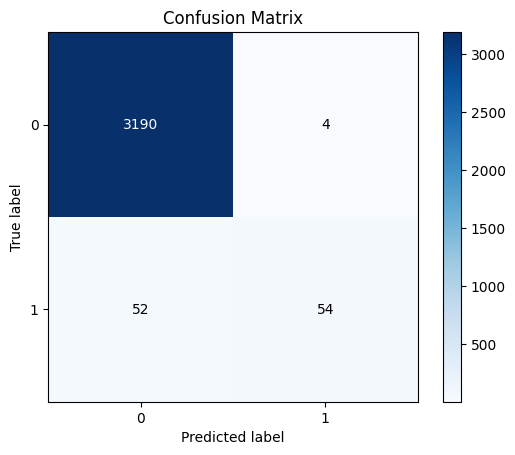

              precision    recall  f1-score   support

           0       0.95      0.53      0.68       107
           1       0.98      1.00      0.99      3193

    accuracy                           0.98      3300
   macro avg       0.97      0.77      0.84      3300
weighted avg       0.98      0.98      0.98      3300



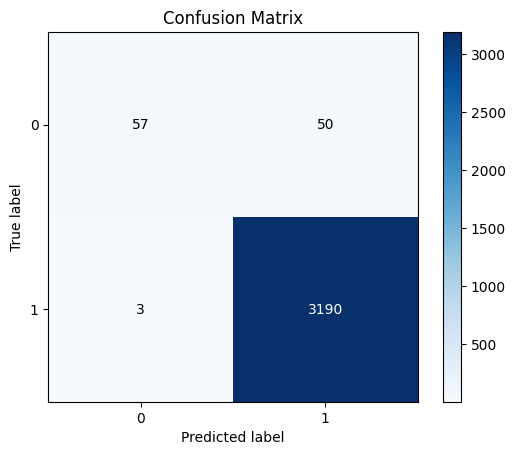

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3268
           1       1.00      0.47      0.64        32

    accuracy                           0.99      3300
   macro avg       1.00      0.73      0.82      3300
weighted avg       0.99      0.99      0.99      3300



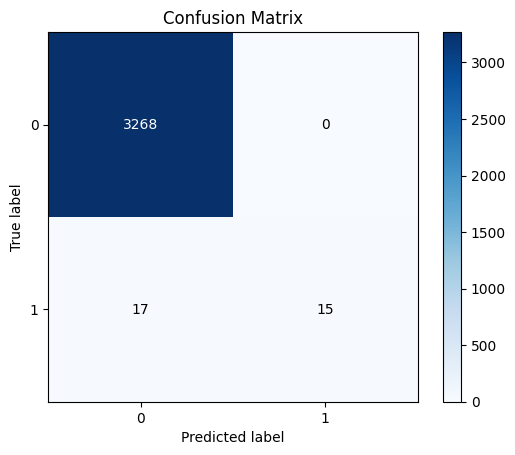

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3276
           1       1.00      0.29      0.45        24

    accuracy                           0.99      3300
   macro avg       1.00      0.65      0.72      3300
weighted avg       0.99      0.99      0.99      3300



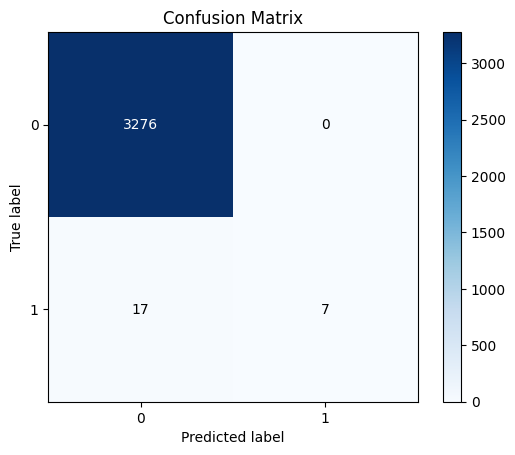

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3269
           1       0.95      0.65      0.77        31

    accuracy                           1.00      3300
   macro avg       0.97      0.82      0.88      3300
weighted avg       1.00      1.00      1.00      3300



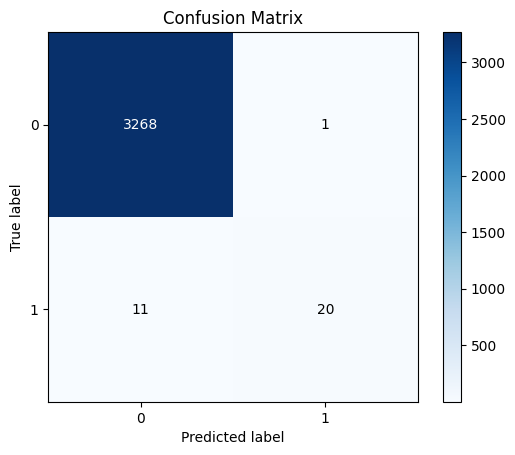

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3283
           1       0.00      0.00      0.00        17

    accuracy                           0.99      3300
   macro avg       0.50      0.50      0.50      3300
weighted avg       0.99      0.99      0.99      3300



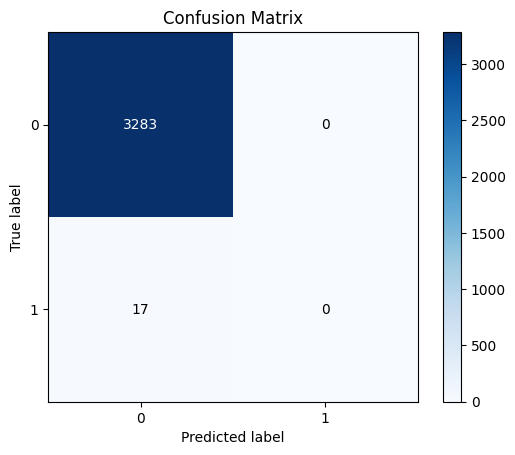

In [ ]:
print(classification_report(y_test[:,0],yhat_rand[:,0]))
tn, fp, fn, tp = confusion_matrix(y_test[:,0],yhat_rand[:,0]).ravel()
skplt.metrics.plot_confusion_matrix(y_test[:,0],yhat_rand[:,0], normalize=False)
plt.show()
print(classification_report(y_test[:,1],yhat_rand[:,1]))
tn, fp, fn, tp = confusion_matrix(y_test[:,1],yhat_rand[:,1]).ravel()
skplt.metrics.plot_confusion_matrix(y_test[:,1],yhat_rand[:,1], normalize=False)
plt.show()
print(classification_report(y_test[:,2],yhat_rand[:,2]))
tn, fp, fn, tp = confusion_matrix(y_test[:,2],yhat_rand[:,2]).ravel()
skplt.metrics.plot_confusion_matrix(y_test[:,2],yhat_rand[:,2], normalize=False)
plt.show()
print(classification_report(y_test[:,3],yhat_rand[:,3]))
tn, fp, fn, tp = confusion_matrix(y_test[:,3],yhat_rand[:,3]).ravel()
skplt.metrics.plot_confusion_matrix(y_test[:,3],yhat_rand[:,3], normalize=False)
plt.show()
print(classification_report(y_test[:,4],yhat_rand[:,4]))
tn, fp, fn, tp = confusion_matrix(y_test[:,4],yhat_rand[:,4]).ravel()
skplt.metrics.plot_confusion_matrix(y_test[:,4],yhat_rand[:,4], normalize=False)
plt.show()
print(classification_report(y_test[:,5],yhat_rand[:,5]))
tn, fp, fn, tp = confusion_matrix(y_test[:,5],yhat_rand[:,5]).ravel()
skplt.metrics.plot_confusion_matrix(y_test[:,5],yhat_rand[:,5], normalize=False)
plt.show()

In [ ]:
from catboost import CatBoostClassifier, Pool, cv

In [ ]:
catb = CatBoostClassifier()
model_catb = MultiOutputClassifier(estimator=catb)

In [ ]:
model_catb.fit(X_train, y_train)
print(model_catb.score(X_test, y_test))

Learning rate set to 0.02321
0:	learn: 0.6449959	total: 182ms	remaining: 3m 1s
1:	learn: 0.6067739	total: 192ms	remaining: 1m 35s
2:	learn: 0.5613759	total: 201ms	remaining: 1m 6s
3:	learn: 0.5225778	total: 213ms	remaining: 53.1s
4:	learn: 0.4904063	total: 224ms	remaining: 44.6s
5:	learn: 0.4616962	total: 238ms	remaining: 39.4s
6:	learn: 0.4329232	total: 251ms	remaining: 35.5s
7:	learn: 0.4101211	total: 260ms	remaining: 32.3s
8:	learn: 0.3876621	total: 271ms	remaining: 29.9s
9:	learn: 0.3672441	total: 281ms	remaining: 27.8s
10:	learn: 0.3476166	total: 291ms	remaining: 26.1s
11:	learn: 0.3291924	total: 300ms	remaining: 24.7s
12:	learn: 0.3133718	total: 310ms	remaining: 23.6s
13:	learn: 0.3003414	total: 321ms	remaining: 22.6s
14:	learn: 0.2849104	total: 331ms	remaining: 21.7s
15:	learn: 0.2713162	total: 341ms	remaining: 21s
16:	learn: 0.2581172	total: 350ms	remaining: 20.2s
17:	learn: 0.2441815	total: 362ms	remaining: 19.8s
18:	learn: 0.2306016	total: 372ms	remaining: 19.2s
19:	learn: 0.

In [ ]:
yhat_catb = model_catb.predict(X_test)

In [ ]:
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,0],yhat_catb[:,0])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,0],yhat_catb[:,0])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,0],yhat_catb[:,0])))
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,1],yhat_catb[:,1])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,1],yhat_catb[:,1])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,1],yhat_catb[:,1])))
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,2],yhat_catb[:,2])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,2],yhat_catb[:,2])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,2],yhat_catb[:,2])))
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,3],yhat_catb[:,3])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,3],yhat_catb[:,3])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,3],yhat_catb[:,3])))
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,4],yhat_catb[:,4])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,4],yhat_catb[:,4])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,4],yhat_catb[:,4])))
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,5],yhat_catb[:,5])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,5],yhat_catb[:,5])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,5],yhat_catb[:,5])))

Accuracy Score: 0.9855
Average Precision Score: 0.5628
Matthews correlation coefficient: 0.7351
Accuracy Score: 0.9864
Average Precision Score: 0.9873
Matthews correlation coefficient: 0.7567
Accuracy Score: 0.9988
Average Precision Score: 0.8762
Matthews correlation coefficient: 0.9348
Accuracy Score: 0.9976
Average Precision Score: 0.6711
Matthews correlation coefficient: 0.8168
Accuracy Score: 0.9970
Average Precision Score: 0.6850
Matthews correlation coefficient: 0.8247
Accuracy Score: 0.9948
Average Precision Score: 0.0052
Matthews correlation coefficient: 0.0000


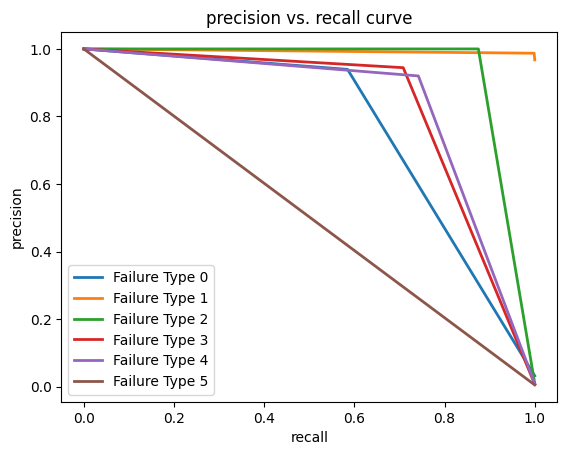

In [ ]:
# precision recall curve
precision = dict()
recall = dict()
n_classes = 6
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:,i],
                                                        yhat_catb[:,i])
    plt.plot(recall[i], precision[i], lw=2, label='Failure Type {}'.format(i))

plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3194
           1       0.94      0.58      0.72       106

    accuracy                           0.99      3300
   macro avg       0.96      0.79      0.86      3300
weighted avg       0.98      0.99      0.98      3300



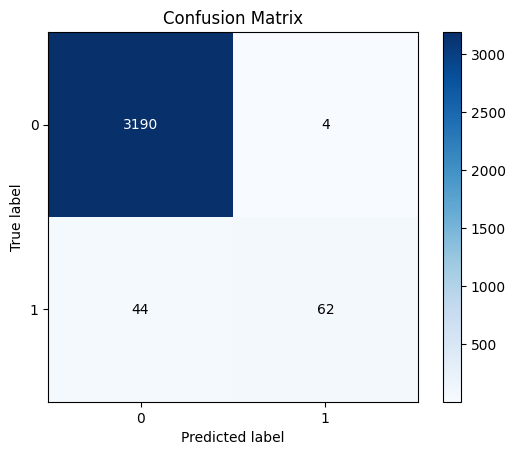

              precision    recall  f1-score   support

           0       0.94      0.62      0.75       107
           1       0.99      1.00      0.99      3193

    accuracy                           0.99      3300
   macro avg       0.97      0.81      0.87      3300
weighted avg       0.99      0.99      0.98      3300



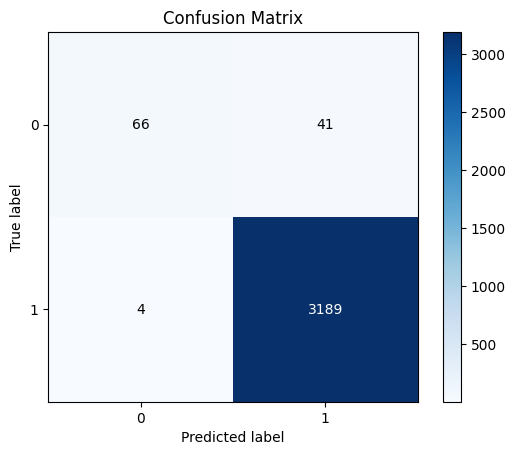

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3268
           1       1.00      0.88      0.93        32

    accuracy                           1.00      3300
   macro avg       1.00      0.94      0.97      3300
weighted avg       1.00      1.00      1.00      3300



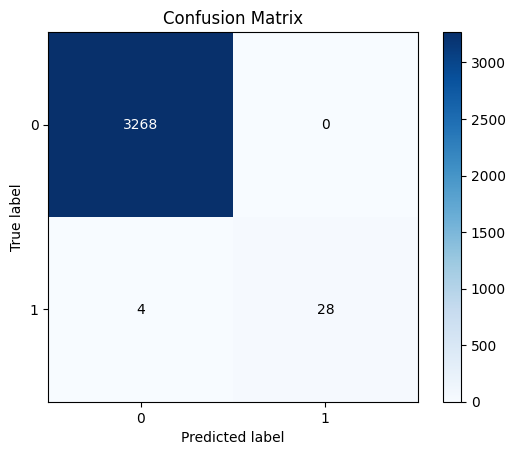

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3276
           1       0.94      0.71      0.81        24

    accuracy                           1.00      3300
   macro avg       0.97      0.85      0.90      3300
weighted avg       1.00      1.00      1.00      3300



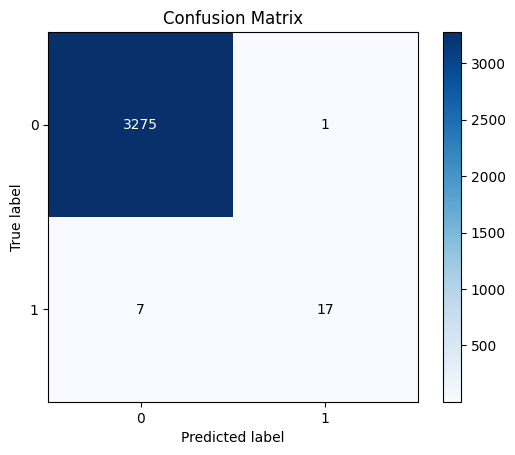

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3269
           1       0.92      0.74      0.82        31

    accuracy                           1.00      3300
   macro avg       0.96      0.87      0.91      3300
weighted avg       1.00      1.00      1.00      3300



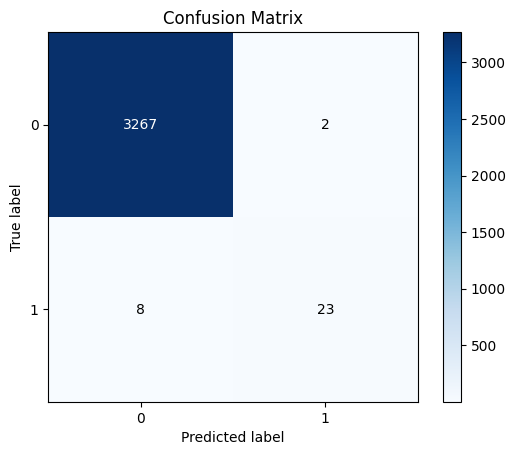

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3283
           1       0.00      0.00      0.00        17

    accuracy                           0.99      3300
   macro avg       0.50      0.50      0.50      3300
weighted avg       0.99      0.99      0.99      3300



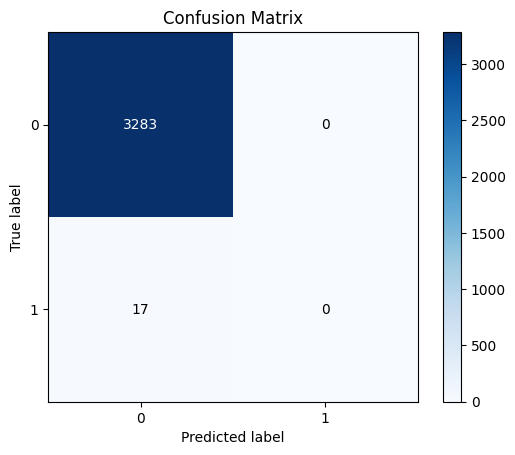

In [ ]:
print(classification_report(y_test[:,0],yhat_catb[:,0]))
tn, fp, fn, tp = confusion_matrix(y_test[:,0],yhat_catb[:,0]).ravel()
skplt.metrics.plot_confusion_matrix(y_test[:,0],yhat_catb[:,0], normalize=False)
plt.show()
print(classification_report(y_test[:,1],yhat_catb[:,1]))
tn, fp, fn, tp = confusion_matrix(y_test[:,1],yhat_catb[:,1]).ravel()
skplt.metrics.plot_confusion_matrix(y_test[:,1],yhat_catb[:,1], normalize=False)
plt.show()
print(classification_report(y_test[:,2],yhat_catb[:,2]))
tn, fp, fn, tp = confusion_matrix(y_test[:,2],yhat_catb[:,2]).ravel()
skplt.metrics.plot_confusion_matrix(y_test[:,2],yhat_catb[:,2], normalize=False)
plt.show()
print(classification_report(y_test[:,3],yhat_catb[:,3]))
tn, fp, fn, tp = confusion_matrix(y_test[:,3],yhat_catb[:,3]).ravel()
skplt.metrics.plot_confusion_matrix(y_test[:,3],yhat_catb[:,3], normalize=False)
plt.show()
print(classification_report(y_test[:,4],yhat_catb[:,4]))
tn, fp, fn, tp = confusion_matrix(y_test[:,4],yhat_catb[:,4]).ravel()
skplt.metrics.plot_confusion_matrix(y_test[:,4],yhat_catb[:,4], normalize=False)
plt.show()
print(classification_report(y_test[:,5],yhat_catb[:,5]))
tn, fp, fn, tp = confusion_matrix(y_test[:,5],yhat_catb[:,5]).ravel()
skplt.metrics.plot_confusion_matrix(y_test[:,5],yhat_catb[:,5], normalize=False)
plt.show()